OAW01
Data extracted
Frames :  120


--------------------------------------------------Results-------------------------------------------------------

Best w1 =  3.797
Best w2 =  2.841
Best lambda =  1.415
Optimal epsilon =  0.014
Loss =  16.0

Target C_alphabet=  3
C_alphabet =  3

Target C_nbr_words =  3
C_words =  13

Target C_LZ =  24.0
C_LZ =  18


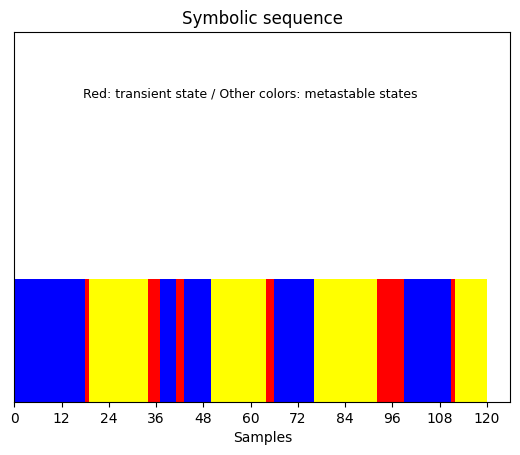

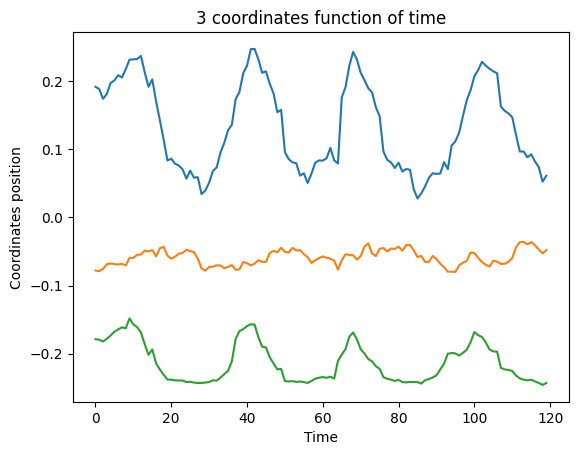

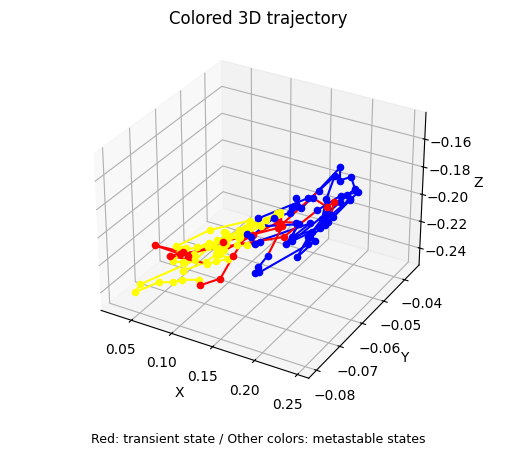

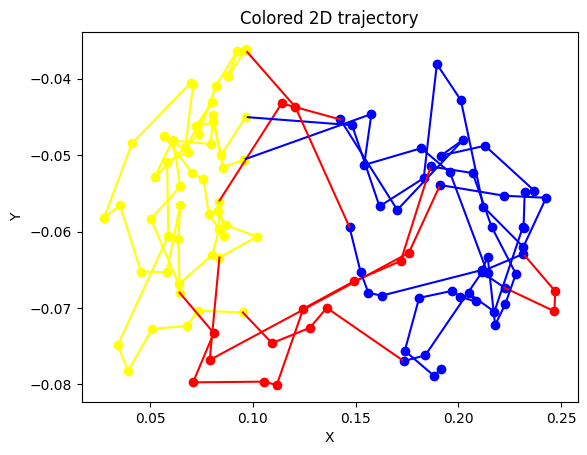

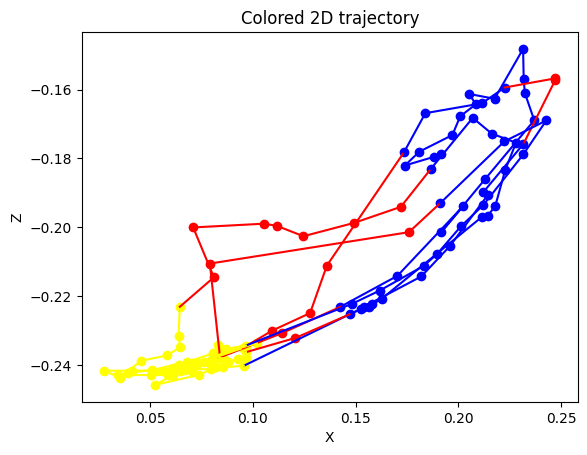

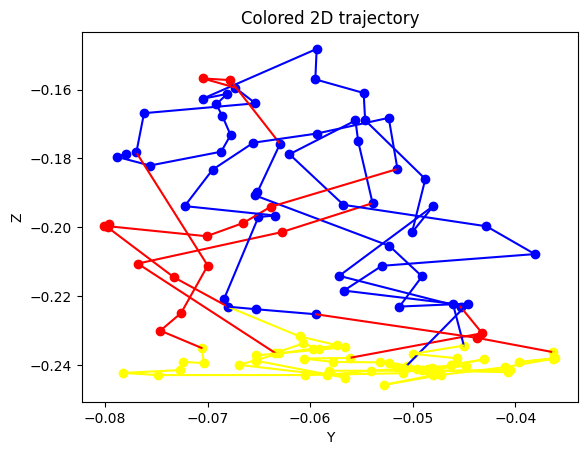

OAW03
Data extracted
Frames :  86


--------------------------------------------------Results-------------------------------------------------------

Best w1 =  4.704
Best w2 =  0.143
Best lambda =  2.595
Optimal epsilon =  0.018
Loss =  8.8

Target C_alphabet=  3
C_alphabet =  4

Target C_nbr_words =  3
C_words =  10

Target C_LZ =  17.2
C_LZ =  18


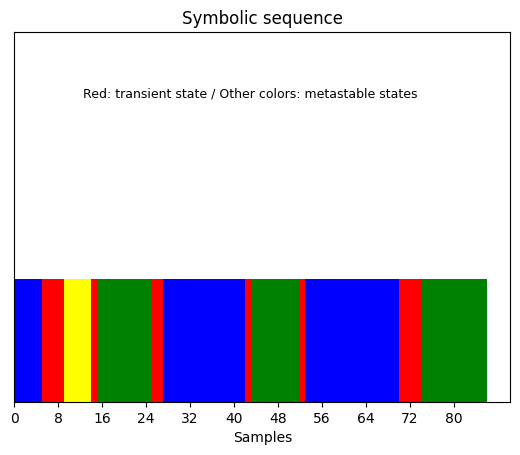

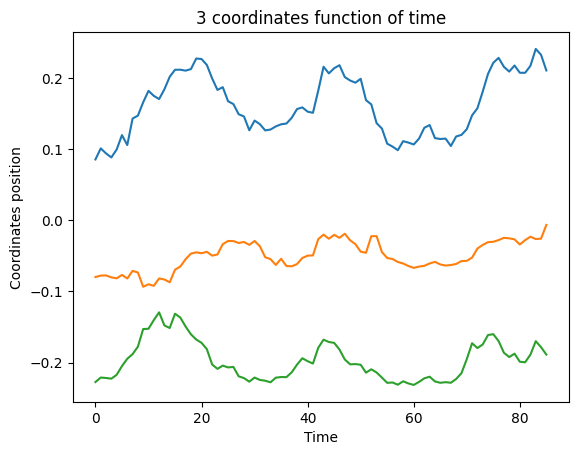

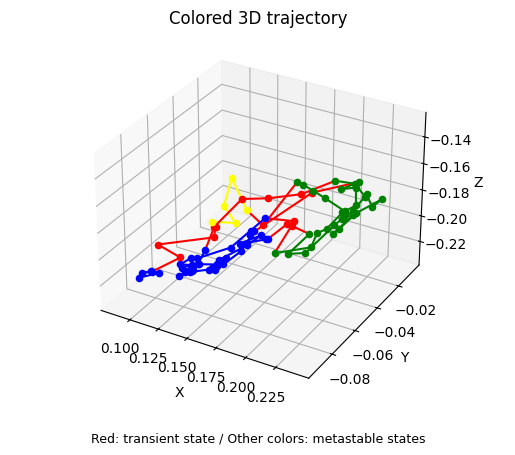

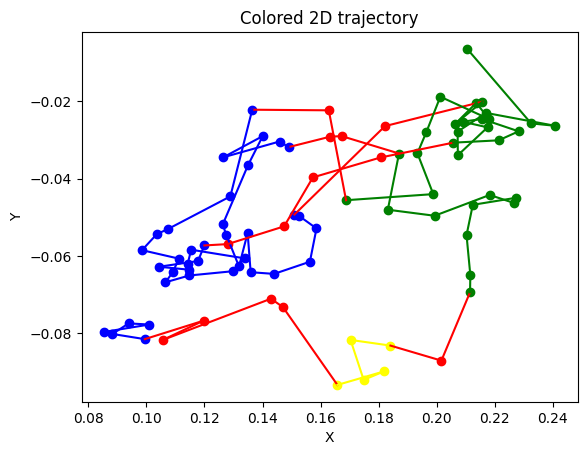

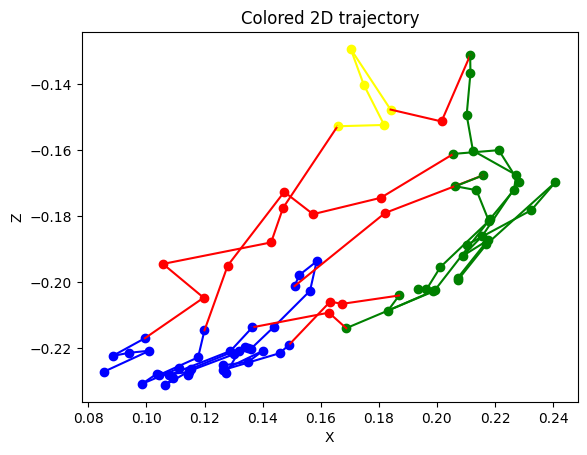

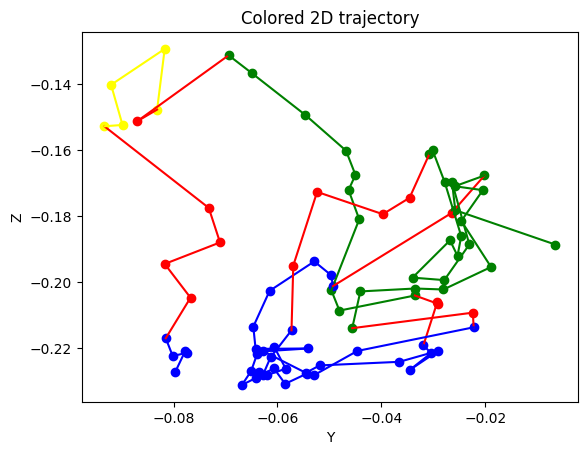

OAW05
Data extracted
Frames :  56


--------------------------------------------------Results-------------------------------------------------------

Best w1 =  0.371
Best w2 =  4.263
Best lambda =  2.839
Optimal epsilon =  0.007
Loss =  5.800000000000001

Target C_alphabet=  3
C_alphabet =  3

Target C_nbr_words =  3
C_words =  7

Target C_LZ =  11.2
C_LZ =  13


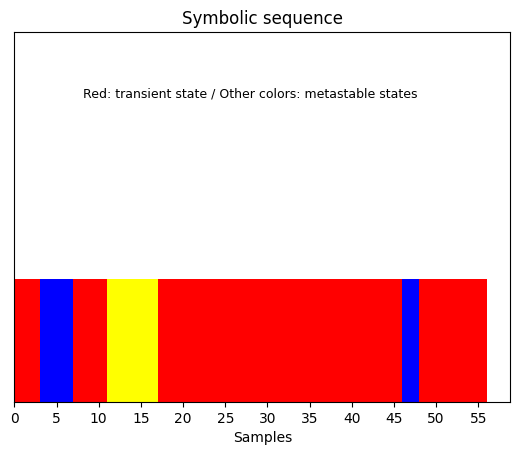

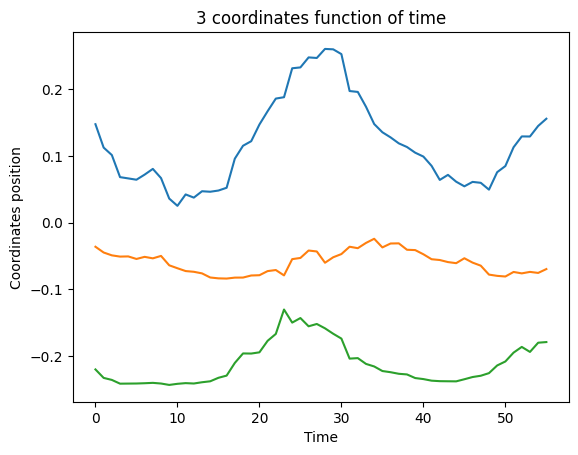

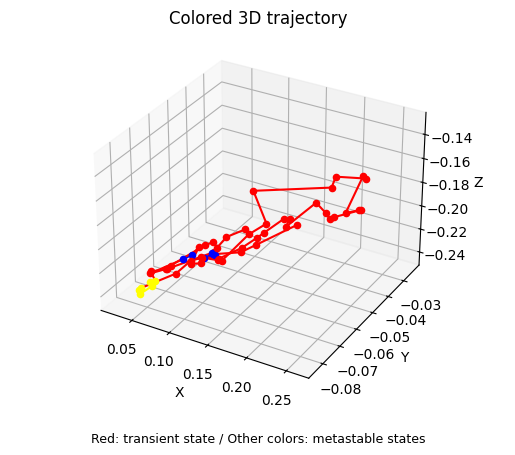

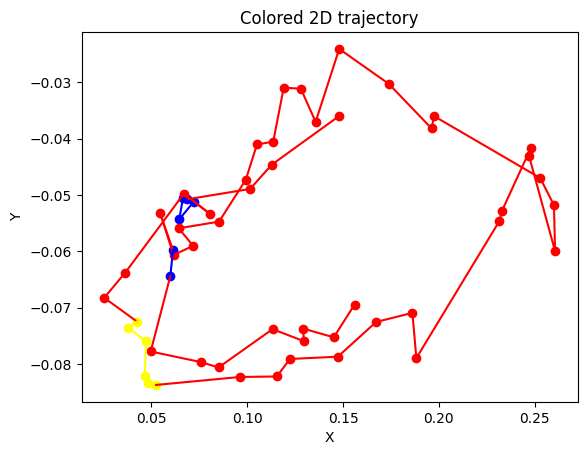

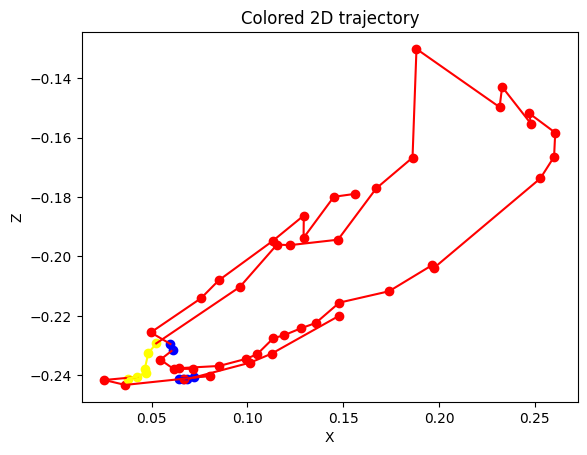

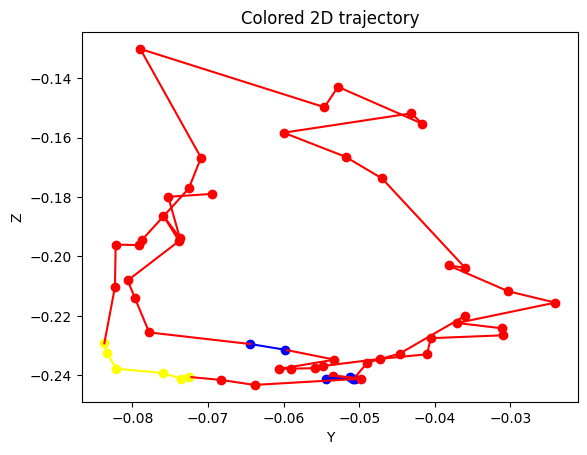

OAW09
Data extracted
Frames :  60


--------------------------------------------------Results-------------------------------------------------------

Best w1 =  2.604
Best w2 =  4.665
Best lambda =  3.355
Optimal epsilon =  0.013
Loss =  16.0

Target C_alphabet=  3
C_alphabet =  5

Target C_nbr_words =  3
C_words =  11

Target C_LZ =  12.0
C_LZ =  18


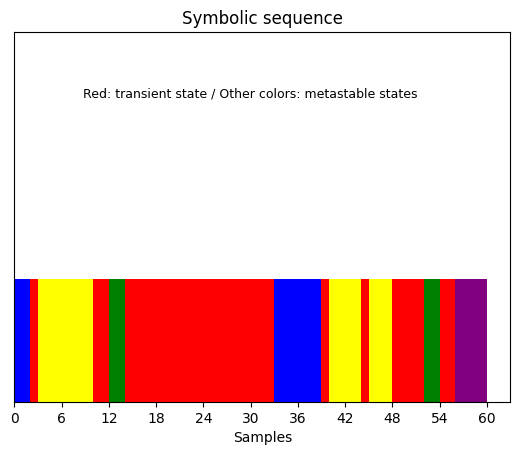

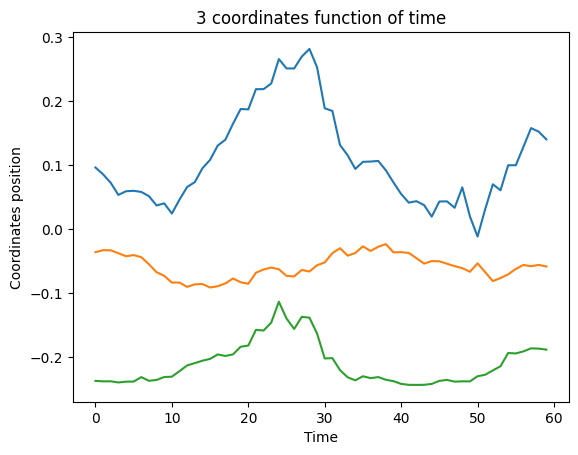

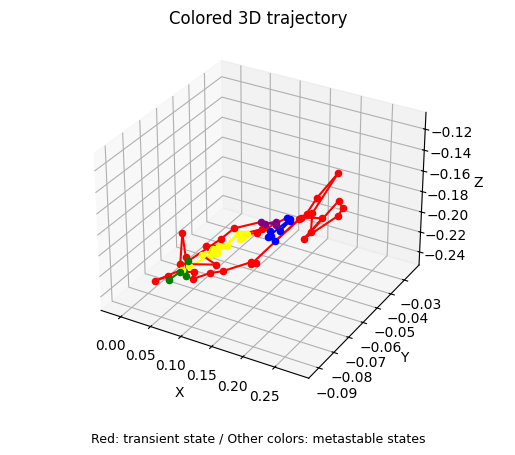

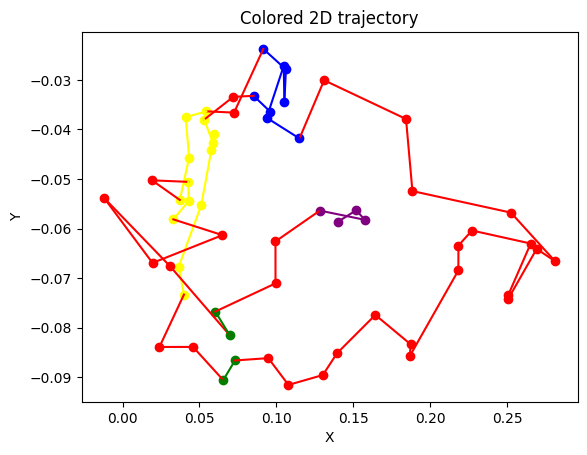

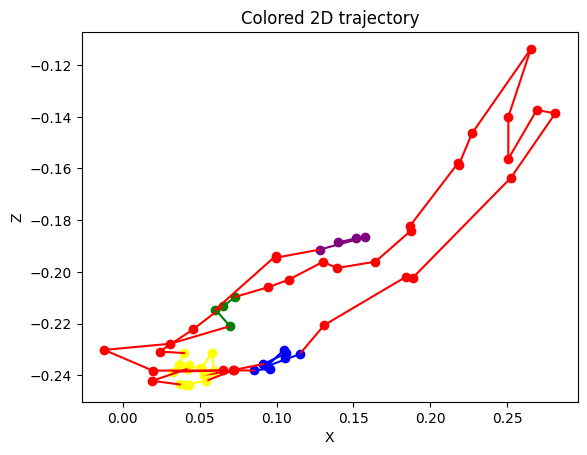

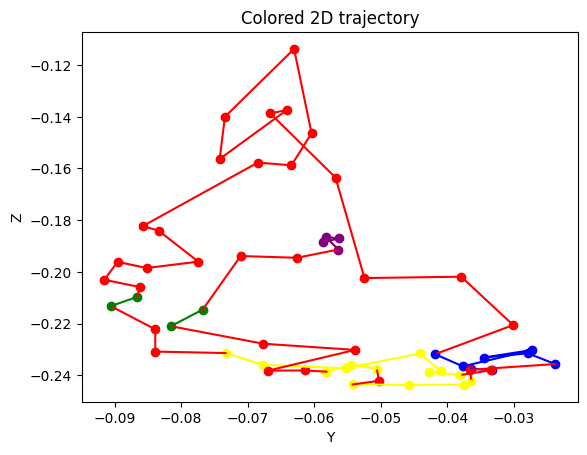

OAW10
Data extracted
Frames :  60


--------------------------------------------------Results-------------------------------------------------------

Best w1 =  2.648
Best w2 =  3.704
Best lambda =  4.014
Optimal epsilon =  0.013
Loss =  10.0

Target C_alphabet=  3
C_alphabet =  3

Target C_nbr_words =  3
C_words =  9

Target C_LZ =  12.0
C_LZ =  16


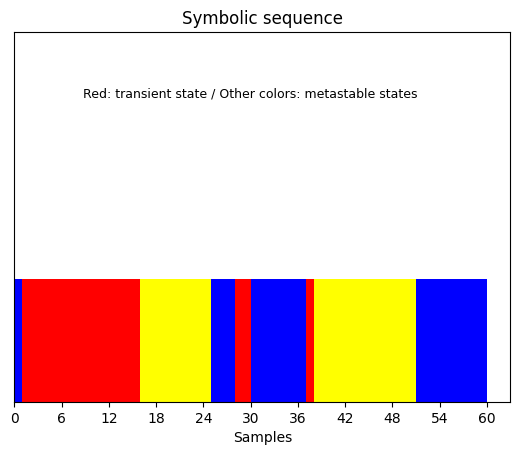

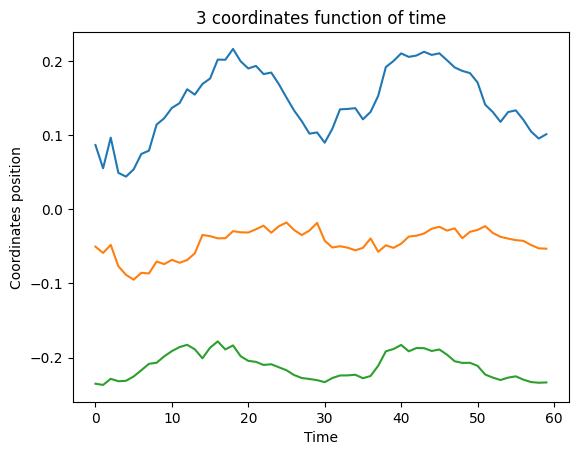

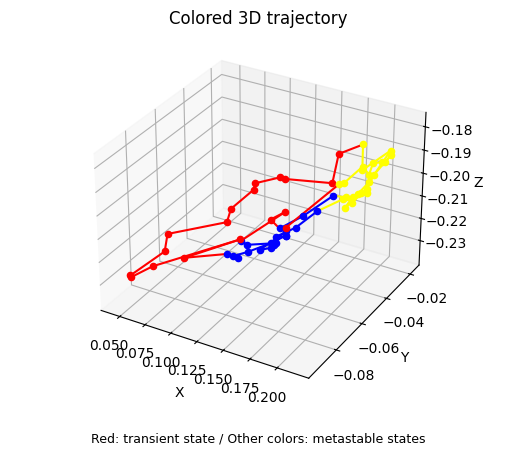

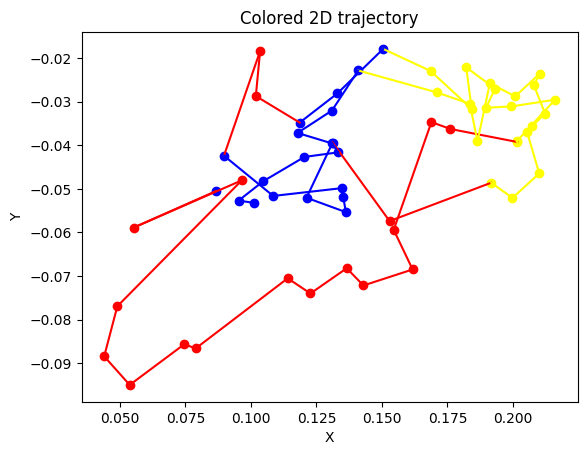

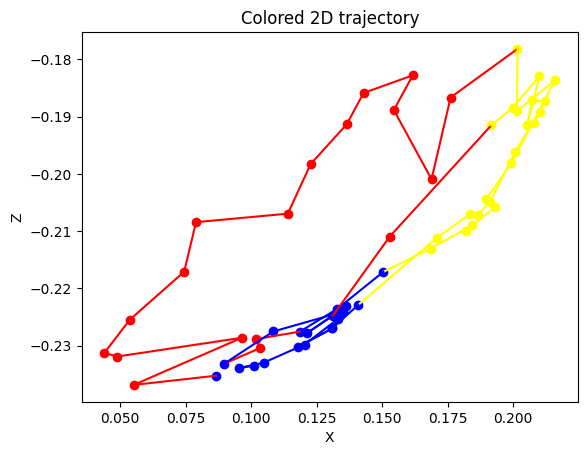

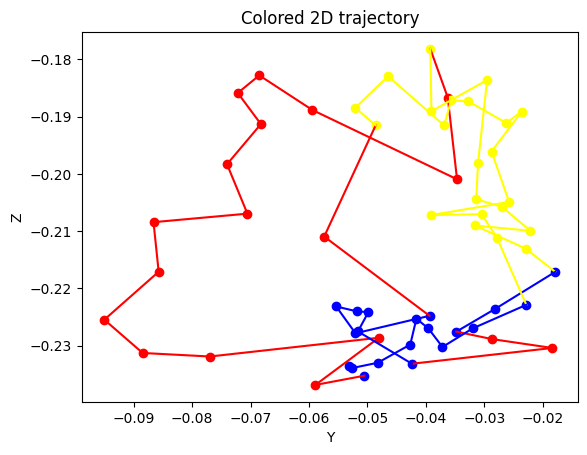

OAW11
Data extracted
Frames :  82


--------------------------------------------------Results-------------------------------------------------------

Best w1 =  1.285
Best w2 =  4.982
Best lambda =  3.397
Optimal epsilon =  0.011
Loss =  14.600000000000001

Target C_alphabet=  3
C_alphabet =  5

Target C_nbr_words =  3
C_words =  13

Target C_LZ =  16.4
C_LZ =  19


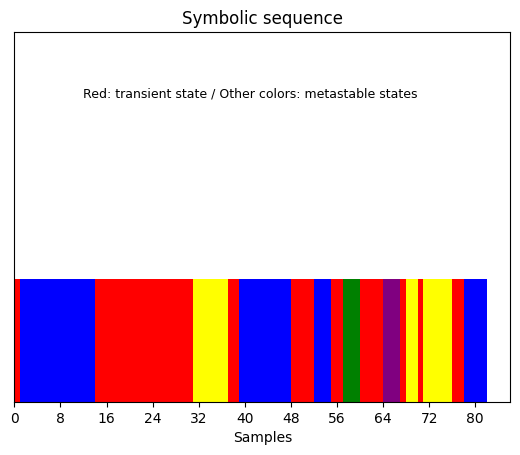

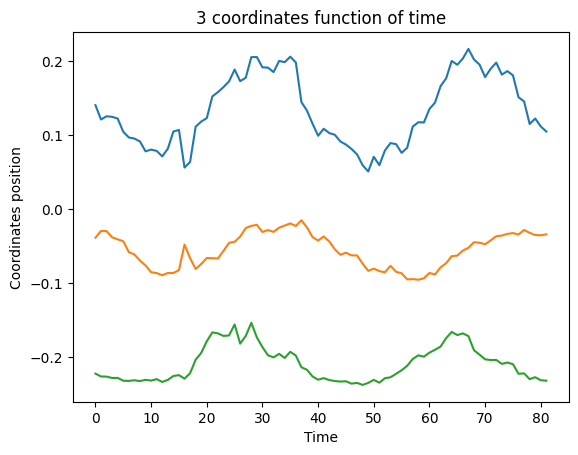

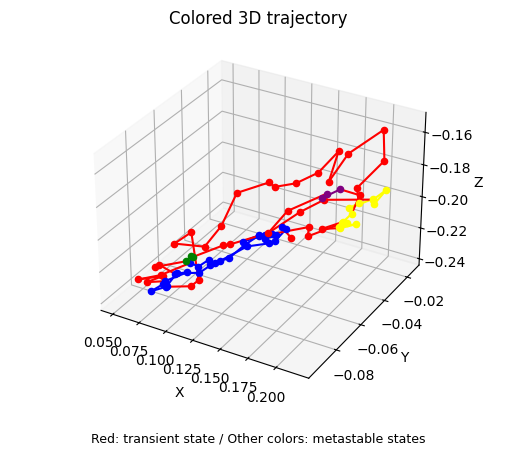

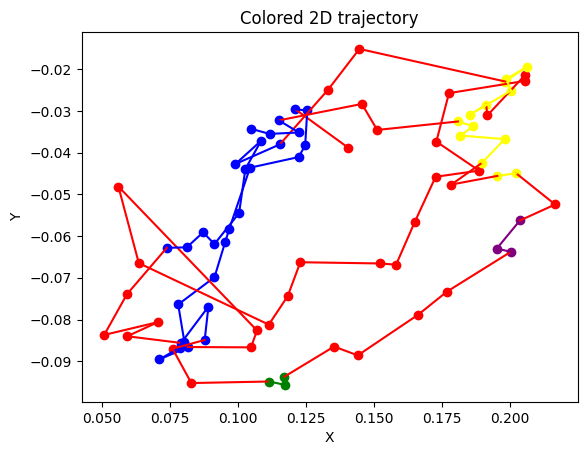

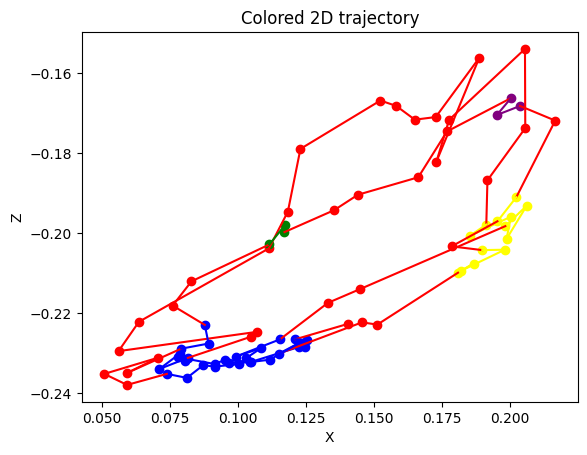

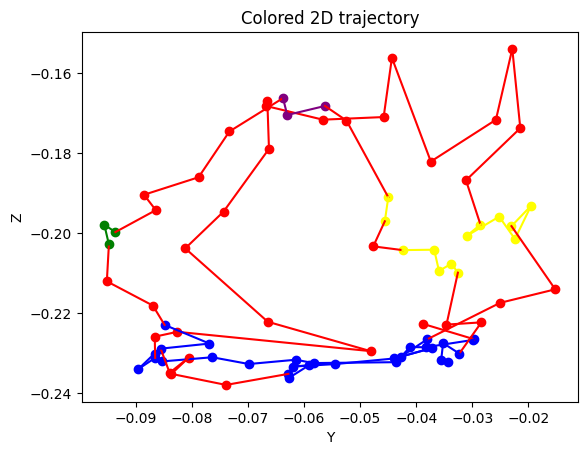

OAW12
Data extracted
Frames :  50


--------------------------------------------------Results-------------------------------------------------------

Best w1 =  4.076
Best w2 =  0.43
Best lambda =  3.022
Optimal epsilon =  0.011
Loss =  7.0

Target C_alphabet=  3
C_alphabet =  4

Target C_nbr_words =  3
C_words =  5

Target C_LZ =  10.0
C_LZ =  14


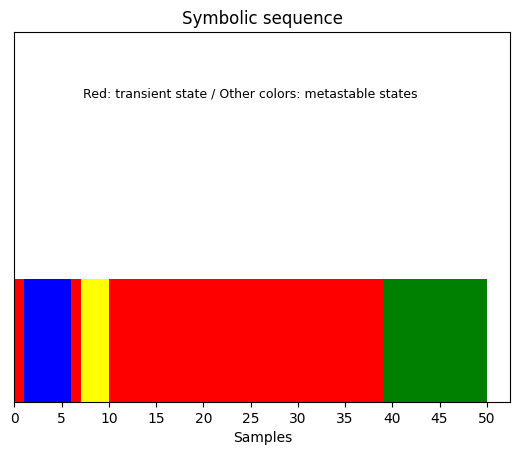

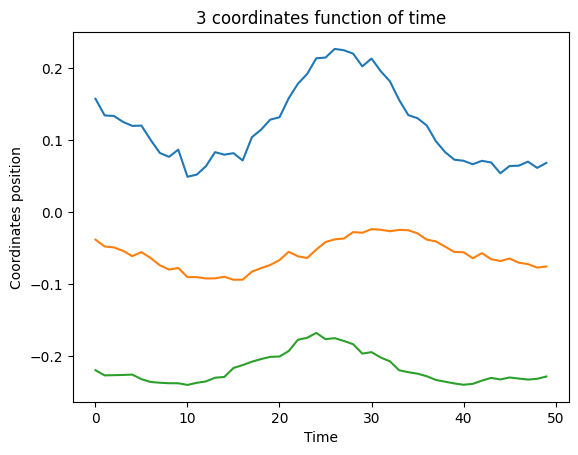

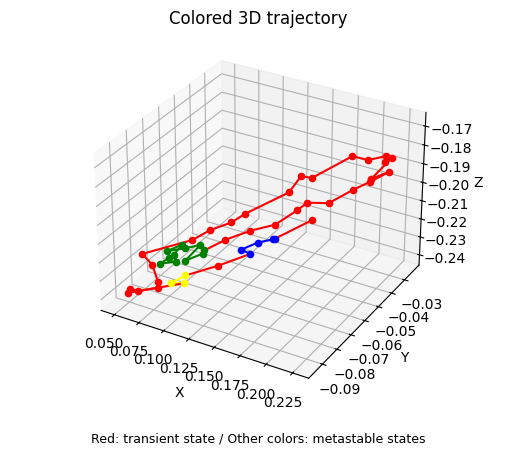

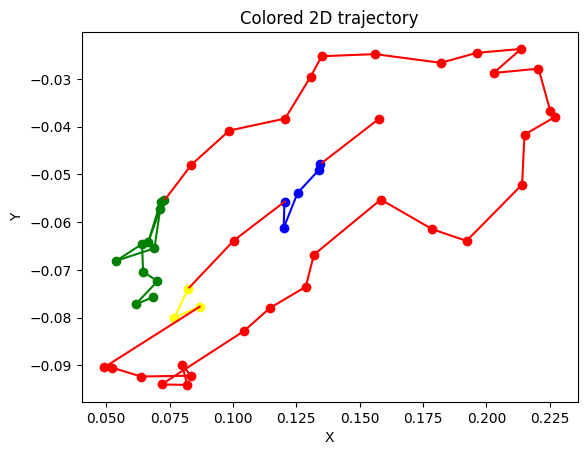

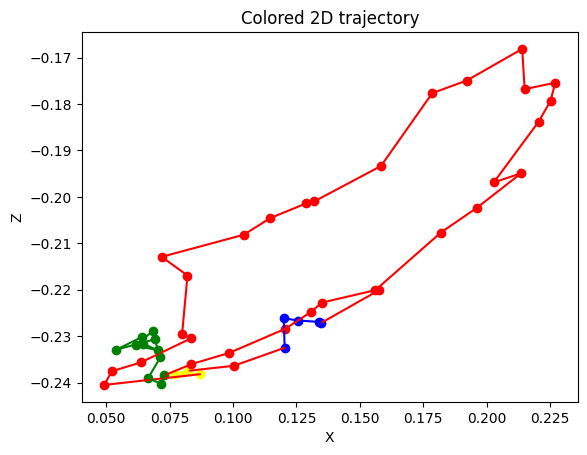

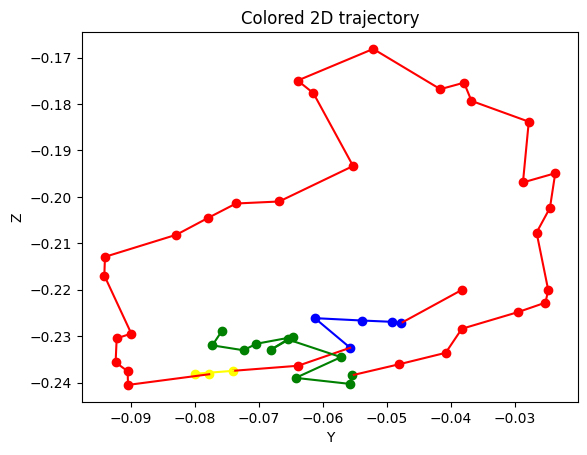

OAW14
Data extracted
Frames :  56


--------------------------------------------------Results-------------------------------------------------------

Best w1 =  0.111
Best w2 =  4.155
Best lambda =  3.303
Optimal epsilon =  0.01
Loss =  8.8

Target C_alphabet=  3
C_alphabet =  4

Target C_nbr_words =  3
C_words =  8

Target C_LZ =  11.2
C_LZ =  14


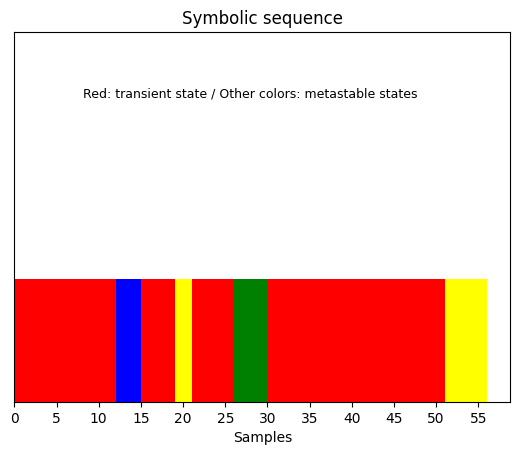

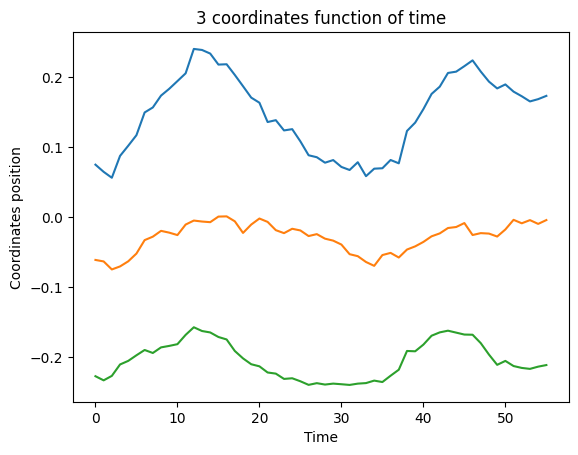

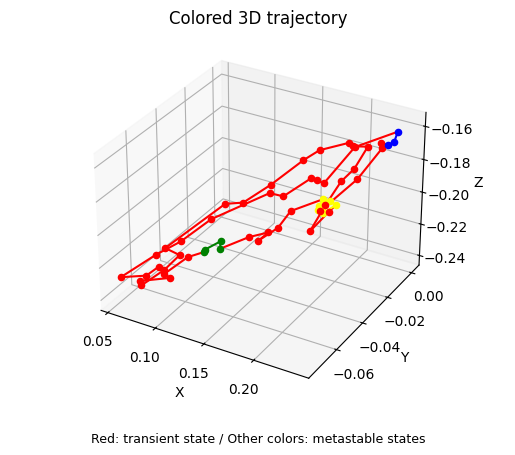

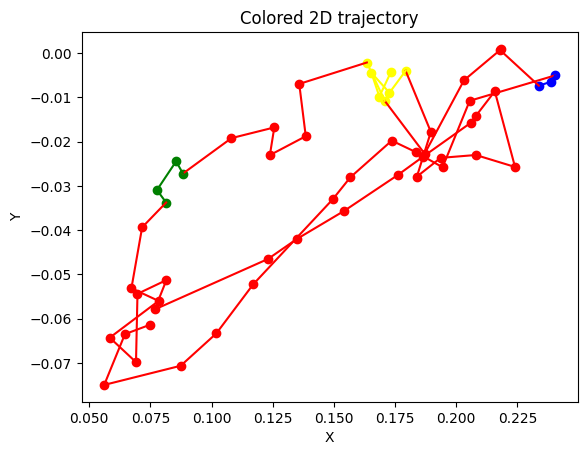

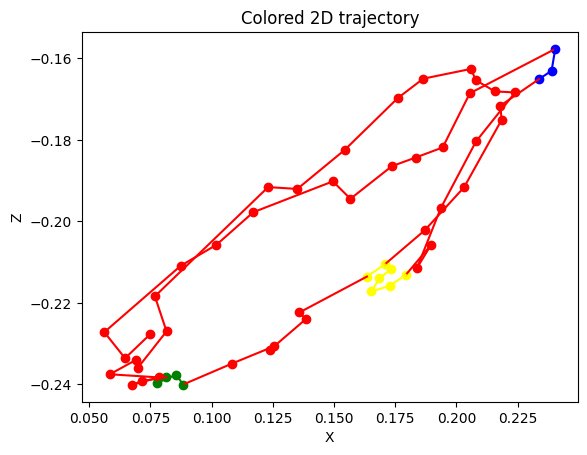

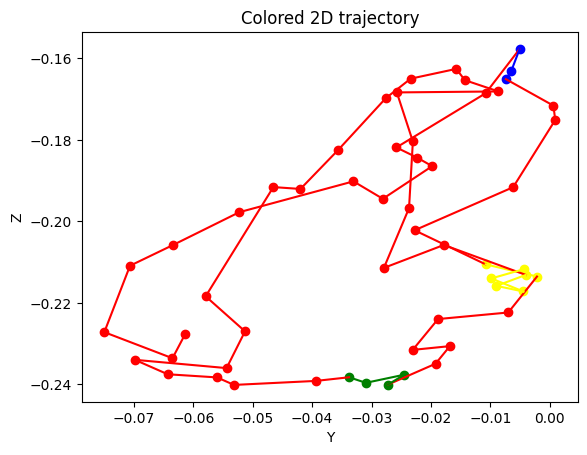


C_alpha :  [3, 4, 3, 5, 3, 5, 4, 4]
C_word :  [13, 10, 7, 11, 9, 13, 5, 8]
C_lz :  [18, 18, 13, 18, 16, 19, 14, 14]


In [140]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import io
import os
import joblib
import random

#---------------------------------------------------------------------------INITIALISATION------------------------------------------------------------------------------
"""X0 = np.array([1,0.17,0.01])
sig =np.array([1,1.2,1.6])
rho = np.array([[1, sig[0]/sig[1]+0.5, sig[0]/sig[2]-0.5],
    [sig[1]/sig[0]-0.5, 1, sig[1]/sig[2]+0.5],
    [sig[2]/sig[0]+0.5, sig[2]/sig[1]-0.5, 1]])
T = 2000
#T=280
deltaT = 0.1429
X1 = np.zeros(T)
X2 = np.zeros(T)
X3 = np.zeros(T)
times = np.linspace(0,deltaT*T, T)
X1[0]=X0[0]
X2[0]=X0[1]
X3[0]=X0[2]

for i in range(T-1):
    X1[i+1] = X1[i] + deltaT*(X1[i]*(sig[0]-rho[0][0]*X1[i]-rho[0][1]*X2[i]-rho[0][2]*X3[i]))
    X2[i+1] = X2[i] + deltaT*(X2[i]*(sig[1]-rho[1][0]*X1[i]-rho[1][1]*X2[i]-rho[1][2]*X3[i]))
    X3[i+1] = X3[i] + deltaT*(X3[i]*(sig[2]-rho[2][0]*X1[i]-rho[2][1]*X2[i]-rho[2][2]*X3[i]))

y=np.vstack((X1,X2,X3))
y = np.squeeze(y)
y = y.T
"""
#y=np.array([[0,0,0], [0,0,0], [0,0,0.1], [0,0,0.2], [0,0,0.3], [0,0,0.5], [0,0,2], [0,0,3.5], [0,0,5], [0,0,8], [0,0,10], [0,1,10], [0,0.5,10.5], [0,1,9.5], [0,0.5,10], [0,1,10], [0,3,10], [0,5,10], [0,7,10], [0,9.8,10], [0,9.8,10], [0,9.9,10], [0,9.95,10], [0,10,10], [0,10.1,10], [0,10,10], [0,10,9.9], [0,10,9.8], [0,10,9.5], [0,10,7.5], [0,10,6], [0,10,4], [0,10,2], [0,10,0.5], [0,10,0.2], [0,10,0.1], [0,10,0.05], [0,10,0], [0,9.8,0], [0,9.5,0], [0,8,0], [0,5,0], [0,3,0], [0,0.5,0], [0,0,0], [0,0,0], [0,0,0.1], [0,0,0.2], [0,0,0.3], [0,0,0.5], [0,0,0.5], [0,0,0.2], [0,0,2], [0,0,3.5], [0,0,5], [0,0,8], [0,0,10], [0,1,10], [0,0.5,10.5], [0,1,9.5], [0,0.5,10], [0,1,10], [0,3,10], [0,5,11], [0,7,10], [0,9.5,10], [0,9.8,10], [0,9.9,10], [0,9.95,10], [0,10,10], [0,10.1,10], [0,10,10], [0,10,9.8], [0,10,9.5], [0,10,8], [0,10,6], [0,10,4], [0,10,2], [0,10,0.5], [0,10,0.2], [0,10,0.1], [0,10,0.05], [0,10,0], [0,9.8,0], [0,9.5,0], [0,8,0], [0,5,0], [0,3,0], [0,0.5,0], [0,0,0], [0,0,0], [0,0,0],[0,0,0], [0,0,0], [0,0,0.1], [0,0,0.2], [0,0,0.3], [0,0,0.5], [0,0,2], [0,0,3.5], [0,0,5]])
data = joblib.load("data_20-01.json")
#data = joblib.load("data_15-01.json")
"""
interv=20
for i in range(interv-1,y.shape[0]-interv):
    if all(y[i,0] > val for val in y[i-interv:i,0]) and all(y[i,0] > val for val in y[i+1:i+interv,0]):
        cpeak_max = cpeak_max+1
        print("max = ",i)
        if cpeak_max == 1 and (cpeak_min == 0 or cpeak_min == 1) :
            first_max = i
            print("max1 = ",i)
        if cpeak_max == 3 and (cpeak_min == 2 or cpeak_min == 3) :
            last_max = i
            print("max3 = ",i)
    if all(y[i,0] < val for val in y[i-interv:i,0]) and all(y[i,0] < val for val in y[i+1:i+interv,0]):
        cpeak_min = cpeak_min+1
        print("min = ",i)
        if cpeak_min == 1 and (cpeak_max == 0 or cpeak_max == 1):
            first_min = i
            print("min1 = ",i)
        if cpeak_min == 3 and (cpeak_max == 2 or cpeak_max == 3) :
            last_min = i
            print("min3 = ",i)
start_frame = int(round((first_max+first_min)/2,0))
end_frame = int(round((last_max+last_min)/2,0))
print(start_frame)
print(end_frame)
y=y[start_frame:end_frame,:]
"""
#y = y[start_frame:end_frame,[1,2]]

def symbseq(R):
            #--------------------------------------------------------------
    #Rewriting grammar
    Serie=np.zeros((R.shape[1]))
    for i in range(R.shape[1]):
        Serie[i]=i+1
    for i in range(R.shape[0]):
        Indx = np.where(R[R.shape[0]-1-i, :]!=0)
        Valmin = 1000000000
        for k in Indx[0]:
            if Serie[k] <= Valmin:
                Valmin = Serie[k]
        for j in Indx[0]:
            if Valmin <= Serie[j]:
                Serie[Serie==Serie[j]] = Valmin
    #----------------------------------------------------------------
    #Writing zeros
    newSerie = np.array(Serie)
    for i in range(Serie.shape[0]):
        if i != 0 and i != Serie.shape[0]-1:
            if Serie[i-1]!=Serie[i] and Serie[i]!=Serie[i+1]:
                newSerie[i]=0
        if i==0:
            if (Serie[i]!=Serie[i+1] and Serie[i]!=Serie[Serie.shape[0]-1]) and np.count_nonzero(Serie == Serie[i])==1:
                newSerie[i]=0
        if i==Serie.shape[0]-1:
            if (Serie[i]!=Serie[i-1] and Serie[i]!=Serie[0]) and np.count_nonzero(Serie == Serie[i])==1:
                newSerie[i]=0
    #"""
    for i in newSerie:
        if np.count_nonzero(newSerie == i) <= 2:
            newSerie[np.where(newSerie == i)] = 0
    #"""
    #----------------------------------------------------------
    #Writing continuous number's sequence
    sort = 1
    Ser = np.sort(newSerie)
    S = np.unique(Ser)
    for i in S:
        if i != 0:
            newSerie = np.where(newSerie == i, sort, newSerie)
            sort = sort+1
    serie = newSerie.astype(int)

    return serie

def opti_epsi_phi(y, length, step, visu=None, back_file=None):
    epsi = 0
    #step = 0.001
    D = cdist(y, y, 'euclidean')
    nbr_epsi = int(math.ceil(np.max(D))/step)

    Epsi = []
    trp = []
    detp = []
    tr_des = []
    det_des = []
    Sum_Pij = []

    #------------------------------------------------------------------------PHI FUNCTION-----------------------------------------------------------
    for e in range(nbr_epsi):
        sumpij=0
        epsi = epsi + step
        R = np.array(D<epsi)
        R=R.astype(int)

        serie = symbseq(R)

        if len(np.unique(serie)) == 1 and np.unique(serie) == 1 :
            break
        else :
            if len(np.unique(serie))>2:
                Epsi.append(epsi)
                f = np.zeros((np.max(serie)+1, np.max(serie)+1))
                r=0
                q=0
                for i in range(len(serie)-1):
                    if serie[i] == 0 and serie[i+1]!=0:
                        r = r+1
                    elif serie[i] != 0 and serie[i+1] == 0:
                        q = q+1
                    f[serie[i], serie[i+1]] = f[serie[i], serie[i+1]] + 1
                s = np.sum(f, axis=0)
                n = f.shape[0]
                P = np.zeros((n, n))
                for i in range(n):
                    for j in range(n):
                        if s[j] != 0:
                            #P[i,j] = f[i,j]/np.sum(f)
                            P[i,j] = f[i,j]/s[j]
                        else:
                            P[i,j]=0
                for i in range(1,n):
                    for j in range(1,n):
                        if i!=j and i!=0 and j!= 0:
                            sumpij = sumpij+P[i,j]

                r=r/(len(serie))
                q=q/(len(serie))

                mat_des = np.zeros((n, n))
                for i in range(n):
                    mat_des[i, 0] = q if i != 0 else 1 - (n - 1) * q
                    mat_des[0, i] = r if i != 0 else 1 - (n - 1) * q
                    mat_des[i, i] = 1 - r if i != 0 else 1 - (n - 1) * q

                trp.append(np.trace(P)) 
                detp.append(np.linalg.det(P))
                tr_des.append(np.trace(mat_des))
                det_des.append(np.linalg.det(mat_des))
                Sum_Pij.append(sumpij)

    err_det = [abs(alpha - beta) for alpha, beta in zip(det_des, detp)]
    err_tr = [abs(alpha - beta) for alpha, beta in zip(tr_des, trp)]

    #mean_err_det = sum(err_det)/len(err_det)
    #mean_err_tr = sum(err_tr)/len(err_tr)
    #mean_Sum_Pij = sum(Sum_Pij)/len(Sum_Pij)
    #w2 = mean_err_tr/mean_err_det
    #lam=mean_err_tr/mean_Sum_Pij
    #w1=1
    #w2=1
    #lam=0.2

#--------------------------------------------------------------------------------Loop-----------------------------------------------------------------------------------------------
    counter=0
    iterations=3000
    w1_best=None
    w2_best=None
    lam_best=None
    best_loss = float('inf')
    alpha_des = 3
    word_des = 3
    Lz_des_min = 11
    Lz_des_max = 31
    Lz_des = length/5
    tol = 3

    while(counter<iterations):
        
        #print("--------------"+str(counter)+"/"+str(iterations)+"--------------")
        counter=counter+1
        #---------------------------------------------------------------------Initialisation----------------------------------------------------------------------------------
        w1 = round(random.uniform(0, 5), 3)
        w2 = round(random.uniform(0, 5), 3)
        lam = round(random.uniform(0, 5), 3)

        phi = [w1*alpha + w2*beta + lam*gamma for alpha, beta, gamma in zip(err_tr, err_det,Sum_Pij)]
        #print('w1 = ',w1)
        #print('w2 = ', w2)
        #print('lambda = ',lam)
        phi_opti = min(phi)
        indices = [i for i in range(len(phi)) if phi[i] == phi_opti]
        opti_epsi = [round(Epsi[i],3) for i in indices]

        #---------------------------------------------------------------------COMBINE PHI FUNCTION WITH ENTROPY FUNCTION--------------------------------------------------
        if len(opti_epsi)>1:
            count = 0
            Entropy = np.zeros(len(opti_epsi))
            for e in opti_epsi:
                R = np.array(D<e)
                R=R.astype(int)

                Serie = symbseq(R)

                p = np.array(np.unique(Serie).shape[0])
                H=0
                occurrences = np.bincount(Serie)
                for valeur, nb_occurrences in enumerate(occurrences):
                    if nb_occurrences > 0:
                        pi = nb_occurrences/Serie.shape[0]
                        H=H+pi*np.log2(pi)

                Hneg = -H
                Entropy[count]= Hneg
                count=count+1

            # Results epsilon
            Hmax = np.max(Entropy)
            IndxHmax = np.argmax(Entropy)
            EpsiOptiH = opti_epsi[IndxHmax]
        else:
            EpsiOptiH = opti_epsi[0]

        #--------------------------------------------------------------Complexity--------------------------------------------------------------------------------------------
        D = cdist(y, y, 'euclidean')
        R = np.array(D<EpsiOptiH)
        R=R.astype(int)

        serie = symbseq(R)

        C_alphabet_size = np.max(serie)+1

        aw = 0
        bw = 0
        W_nw = []

        for i in range(len(serie)-1):
            w = ''
            if serie[i] != serie[i+1]:
                for j in range(aw, i+1, 1):
                    w = w + str(int(serie[j]))
                W_nw.append(w)
                aw = i + 1
            if i == len(serie)-2:
                for j in range(aw, i+2, 1):
                    w = w + str(int(serie[j]))
                W_nw.append(w)
        unique = set(W_nw)
        C_nbr_words = len(unique)

        # Lempel-Ziv

        def pattern_in_serie(w, s):
            w_str = ''
            s_str = ''
            for a in w:
                w_str=w_str+str(a)
            for b in s:
                s_str = s_str+str(b)
            return s_str in w_str

        i = 0
        W_LZ = []
        W_LZ.append(serie[i])
        i = 1
        while i < len(serie):
            j = i
            Bool = pattern_in_serie(W_LZ[:j], str(serie[j]))
            if Bool == False:
                W_LZ.append(str(serie[i]))
                i = i + 1
            else:
                while Bool == True:
                    j = j + 1
                    if j >= len(serie):
                        break
                    Bool = pattern_in_serie(W_LZ[:j], serie[i:j + 1])
                W_LZ.append(''.join(map(str, serie[i:j + 1])))
                i = j + 1

        C_LZ = len(W_LZ)

        #print('C_alphabet = ', C_alphabet_size)
        #print('C_words = ', C_nbr_words)
        #print('C_LZ = ', C_LZ)
        #print("Epsilon = ",EpsiOptiH)
        def loss_fct(alpha_des,word_des,Lz_des,C_alphabet_size,C_nbr_words,C_LZ):
            loss = abs(alpha_des-C_alphabet_size)+abs(word_des-C_nbr_words)+abs(Lz_des-C_LZ)
            return loss

        loss = loss_fct(alpha_des,word_des,Lz_des,C_alphabet_size,C_nbr_words,C_LZ)
        #print("Loss = ",loss)
        if loss < best_loss and C_LZ>Lz_des_min and C_LZ<Lz_des_max:
        #if loss < best_loss:
            w1_best = w1
            w2_best = w2
            lam_best = lam
            C_alpha_best = C_alphabet_size
            C_word_best = C_nbr_words
            C_Lz_best = C_LZ
            best_loss = loss
        if loss < tol:
            break

    phi = [w1_best*alpha + w2_best*beta + lam_best*gamma for alpha, beta, gamma in zip(err_tr, err_det,Sum_Pij)]
    print("")
    print("\n--------------------------------------------------Results-------------------------------------------------------")
    print('\nBest w1 = ',w1_best)
    print('Best w2 = ', w2_best)
    print('Best lambda = ',lam_best)
    phi_opti = min(phi)
    indices = [i for i in range(len(phi)) if phi[i] == phi_opti]
    opti_epsi = [round(Epsi[i],3) for i in indices]
    #---------------------------------------------------------------------COMBINE PHI FUNCTION WITH ENTROPY FUNCTION--------------------------------------------------
    if len(opti_epsi)>1:
        count = 0
        Entropy = np.zeros(len(opti_epsi))
        for e in opti_epsi:
            R = np.array(D<e)
            R=R.astype(int)

            Serie = symbseq(R)

            p = np.array(np.unique(Serie).shape[0])
            H=0
            occurrences = np.bincount(Serie)
            for valeur, nb_occurrences in enumerate(occurrences):
                if nb_occurrences > 0:
                    pi = nb_occurrences/Serie.shape[0]
                    H=H+pi*np.log2(pi)

            Hneg = -H
            Entropy[count]= Hneg
            count=count+1

        # Results epsilon
        Hmax = np.max(Entropy)
        IndxHmax = np.argmax(Entropy)
        EpsiOptiH = opti_epsi[IndxHmax]
    else:
        EpsiOptiH = opti_epsi[0]
    
    print('Optimal epsilon = ',EpsiOptiH)
    print("Loss = ",best_loss)
    print("\nTarget C_alphabet= ",alpha_des)    
    print('C_alphabet = ', C_alpha_best)
    print("\nTarget C_nbr_words = ",word_des)
    print('C_words = ', C_word_best)
    #print("\nTarget C_LZ : ",Lz_des_min," ; ",Lz_des_max)
    print("\nTarget C_LZ = ",Lz_des)
    print('C_LZ = ', C_Lz_best)


    return EpsiOptiH,C_alpha_best,C_word_best,C_Lz_best

def test_epsi(y):
    #------------------------------------------------------------TEST OF THE OPTIMAL EPSILON---------------------------------------------------------------------------
    D = cdist(y, y, 'euclidean')
    R = np.array(D<EpsiOptiH)
    R=R.astype(int)

    serie = symbseq(R)

    position = 0
    palette = ['red', 'blue', 'yellow', 'green', 'purple', 'orange', 'black', 'pink', 'brown', 'gray', 'turquoise', 'indigo', 'beige', 'olive', 'cyan', 'magenta', 'gold', 'silver', 'coral', 'lavender', 'chartreuse', 'orangered', 'aquamarine', 'skyblue', 'pumpkin', 'emerald']

    if len(palette) > np.max(serie):
        fig, ax = plt.subplots()
        ax.set_title("Symbolic sequence")
        for couleur in serie:
            ax.barh(y=0, width=1, color=palette[int(couleur)], height=0.2, left=position)
            position += 1

        ax.set_ylim(0, 0.3)
        ax.axis('off')
        
        
        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_ylim(ax.get_ylim())
        ax2.set_xticks(np.arange(0, len(serie) + 1, int(len(serie)/10)))
        ax2.set_xticklabels(np.arange(0, len(serie) + 1, int(len(serie)/10)))
        ax2.tick_params(axis='x', which='both', bottom=True, top=False, labeltop = False, labelbottom=True)
        ax2.set_xlabel('Samples')
        ax2.xaxis.set_label_position('bottom')
        ax.text(int(serie.shape[0])/2, 0.25,"Red: transient state / Other colors: metastable states", fontsize=9, ha='center', va='center')

        plt.show(block=False)

        time = np.arange(start=0, stop=y.shape[0], step=1)

        if y.shape[1] == 3:
            fig = plt.figure()
            plt.title("3 coordinates function of time")
            plt.xlabel("Time")
            plt.ylabel("Coordinates position")
            plt.plot(time, y[:,0])
            plt.plot(time, y[:,1])
            plt.plot(time, y[:,2])
            figure = plt.figure()
            plt.axis('off')
            plt.title("Colored 3D trajectory")
            ax = figure.add_subplot(111, projection='3d')
            ax.scatter(y[0, 0],y[0,1],y[0,2], color=palette[int(serie[0])], marker='o')
            for i in range(serie.shape[0]-1):
                ax.scatter(y[i+1, 0],y[i+1,1],y[i+1,2], color=palette[int(serie[i+1])], marker='o')
                if serie[i+1]==0:
                    ax.plot(y[i:i+2, 0],y[i:i+2,1],y[i:i+2,2], color='red')
                else:
                    ax.plot(y[i:i+2, 0],y[i:i+2,1],y[i:i+2,2], color=palette[int(serie[i])])
            ax.text2D(0.5, -0.1, "Red: transient state / Other colors: metastable states", transform=ax.transAxes, fontsize=9, ha='center', va='center')
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')

            figure2 = plt.figure()
            plt.title("Colored 2D trajectory")
            plt.scatter(y[0, 0],y[0,1], color=palette[int(serie[0])], marker='o')
            for i in range(serie.shape[0]-1):
                plt.scatter(y[i+1, 0],y[i+1,1], color=palette[int(serie[i+1])], marker='o')
                if serie[i+1]==0:
                    plt.plot(y[i:i+2, 0],y[i:i+2,1], color='red')
                else:
                    plt.plot(y[i:i+2, 0],y[i:i+2,1], color=palette[int(serie[i])])
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.show(block=False)
            plt.show(block=False)

            figure3 = plt.figure()
            plt.title("Colored 2D trajectory")
            plt.scatter(y[0, 0],y[0,2], color=palette[int(serie[0])], marker='o')
            for i in range(serie.shape[0]-1):
                plt.scatter(y[i+1, 0],y[i+1,2], color=palette[int(serie[i+1])], marker='o')
                if serie[i+1]==0:
                    plt.plot(y[i:i+2, 0],y[i:i+2,2], color='red')
                else:
                    plt.plot(y[i:i+2, 0],y[i:i+2,2], color=palette[int(serie[i])])
            plt.xlabel('X')
            plt.ylabel('Z')
            plt.show(block=False)
            plt.show(block=False)

            figure4 = plt.figure()
            plt.title("Colored 2D trajectory")
            plt.scatter(y[0, 1],y[0,2], color=palette[int(serie[0])], marker='o')
            for i in range(serie.shape[0]-1):
                plt.scatter(y[i+1, 1],y[i+1,2], color=palette[int(serie[i+1])], marker='o')
                if serie[i+1]==0:
                    plt.plot(y[i:i+2, 1],y[i:i+2,2], color='red')
                else:
                    plt.plot(y[i:i+2, 1],y[i:i+2,2], color=palette[int(serie[i])])
            plt.xlabel('Y')
            plt.ylabel('Z')
            plt.show(block=False)
            plt.show(block=False)

        if y.shape[1] == 2:
            fig = plt.figure()
            plt.title("2 coordinates function of time")
            plt.xlabel("Time")
            plt.ylabel("Coordinates position")
            plt.plot(time, y[:,0])
            plt.plot(time, y[:,1])
            figure = plt.figure()
            plt.title("Colored 2D trajectory")
            plt.scatter(y[0, 0],y[0,1], color=palette[int(serie[0])], marker='o')
            for i in range(serie.shape[0]-1):
                plt.scatter(y[i+1, 0],y[i+1,1], color=palette[int(serie[i+1])], marker='o')
                if serie[i+1]==0:
                    plt.plot(y[i:i+2, 0],y[i:i+2,1], color='red')
                else:
                    plt.plot(y[i:i+2, 0],y[i:i+2,1], color=palette[int(serie[i])])
            plt.xlabel('Coordinate 1')
            plt.ylabel('Coordinate 2')
            plt.show(block=False)

vid_c_alpha = []
vid_c_word = []
vid_c_lz = []
for vid in data:
#for h in range (1):
    #vid="OAW10"
    print(vid)
    #vidname = data["OAW03"]
    #number_frame = input("\nHow many frames to analyze ? ")
    #number_frame=int(number_frame)
    vidname = data[vid]
    data_final=np.array(vidname['joints3D'])
    x = np.zeros((data_final.shape[1], data_final.shape[0], data_final.shape[2]))
    for k in range(data_final.shape[1]):
        x[k,:,0]=data_final[:,k,2]
        x[k,:,1]=data_final[:,k,0]
        x[k,:,2]=data_final[:,k,1]
    x[:, :, 2] *= -1
    diagnosis = vidname['diag']
    sex = vidname['sex']
    print("Data extracted")
    a_list = [12,13,14]
    cpeak_max = 0
    cpeak_min = 0
    y= np.mean(x[a_list,:,:],axis = 0)
    #y = y[:,[0,2]]
    length = y.shape[0]
    print("Frames : ",length)      
    EpsiOptiH,C_alpha,C_word,C_lz = opti_epsi_phi(y, length, 0.001, 1)
    vid_c_alpha.append(C_alpha)
    vid_c_word.append(C_word)
    vid_c_lz.append(C_lz)

    test_epsi(y)

print("\nC_alpha : ",vid_c_alpha)
print("C_word : ",vid_c_word)
print("C_lz : ",vid_c_lz)


        